# Ford GoBike System Data
#### This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

 $Note$ $about$ $dataset$: Here you'll find Bay Wheels's trip data for public use. So whether you're a designer, developer or just plain curious, feel free to download it and bring it to life. This data is provided according to the Bay Wheels License Agreement.
The Data

The dataset consists of columns:

    Trip Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


### Interested to anaswer following questions about the dataset
- When are most trips taken in terms of time of day, day of the week?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Gather data
df = pd.read_csv('202006-baywheels-tripdata.csv')

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
ride_id               158168 non-null object
rideable_type         158168 non-null object
started_at            158168 non-null object
ended_at              158168 non-null object
start_station_name    99220 non-null object
start_station_id      99220 non-null float64
end_station_name      97151 non-null object
end_station_id        97151 non-null float64
start_lat             158168 non-null float64
start_lng             158168 non-null float64
end_lat               157892 non-null float64
end_lng               157892 non-null float64
member_casual         158168 non-null object
dtypes: float64(6), object(7)
memory usage: 15.7+ MB


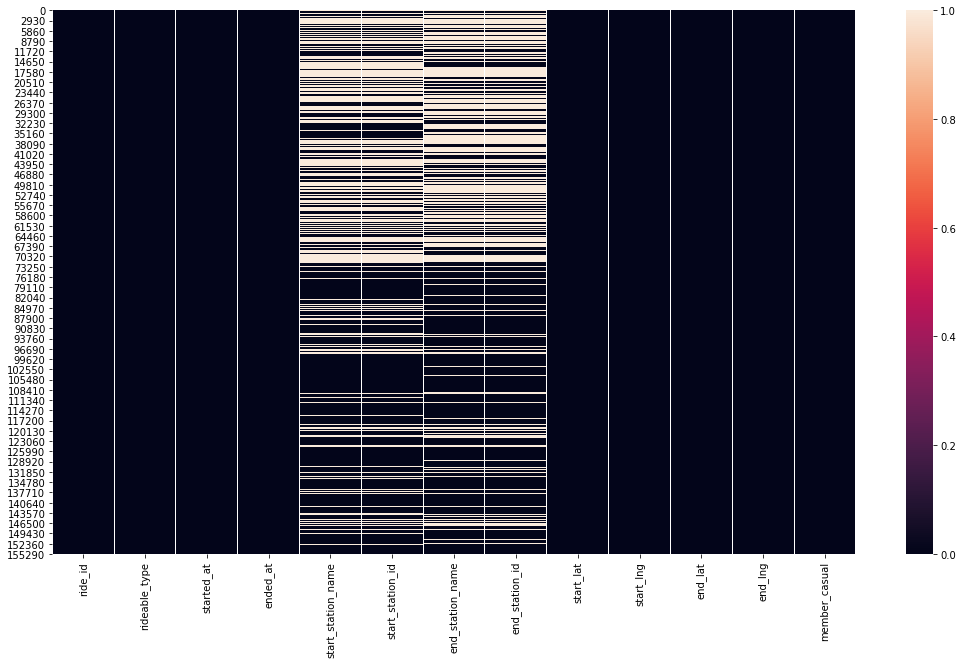

In [5]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull());

Here most of the missing data in start station and its id with end station and its id. We dont need these columns in furthur analysis

In [6]:
# clean the data
df_clean = df.copy()
df_clean.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [7]:
df_clean.drop(['start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id'], axis=1, inplace=True)

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 9 columns):
ride_id          158168 non-null object
rideable_type    158168 non-null object
started_at       158168 non-null object
ended_at         158168 non-null object
start_lat        158168 non-null float64
start_lng        158168 non-null float64
end_lat          157892 non-null float64
end_lng          157892 non-null float64
member_casual    158168 non-null object
dtypes: float64(4), object(5)
memory usage: 10.9+ MB


In [9]:
# change datatypes
df_clean['started_at'] = pd.to_datetime(df_clean['started_at'])
df_clean['ended_at'] = pd.to_datetime(df_clean['ended_at'])

In [10]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,37.769841,-122.42921,37.772894,-122.509079,casual


In [11]:
# Visualize

### Which type of ride_type is preferred? and does the above depend on if a user is a Member or Casual?

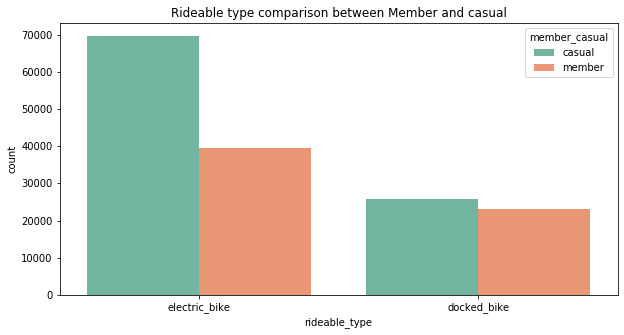

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'rideable_type', hue = 'member_casual', data = df_clean, palette="Set2")
plt.title('Rideable type comparison between Member and casual');

There are more rides for electric bike than docked. In member type, casual people prefered more electric

### When are most trips taken in terms of time of day, day of the week? How does it depends on Member and casual?

### Hour-wise

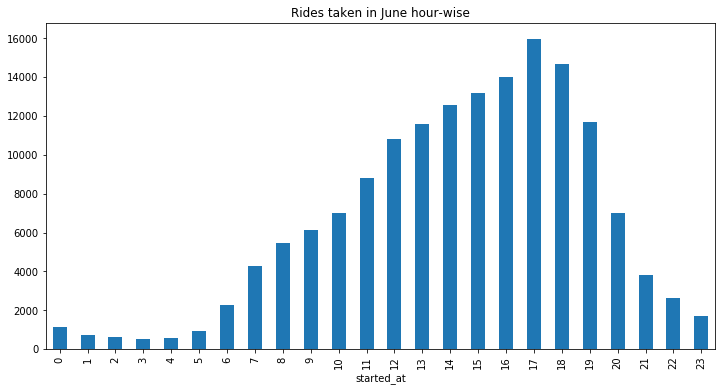

In [13]:
plt.figure(figsize=(12, 6))
df_clean.groupby(df_clean.started_at.dt.hour)['ride_id'].count().plot.bar(title='Rides taken in June hour-wise');

Peak hour is 17 hrs for day wise data with consideration of whole data

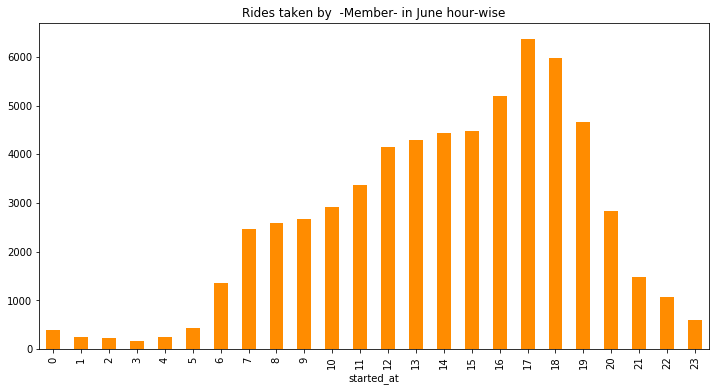

In [14]:
plt.figure(figsize=(12, 6))
df_clean[df_clean['member_casual'] == 'member'].groupby(df_clean.started_at.dt.hour)['ride_id'].count().plot.bar(title='Rides taken by  -Member- in June hour-wise', color= 'darkorange');

Peak hour is 17 hrs for day wise data with consideration of member data

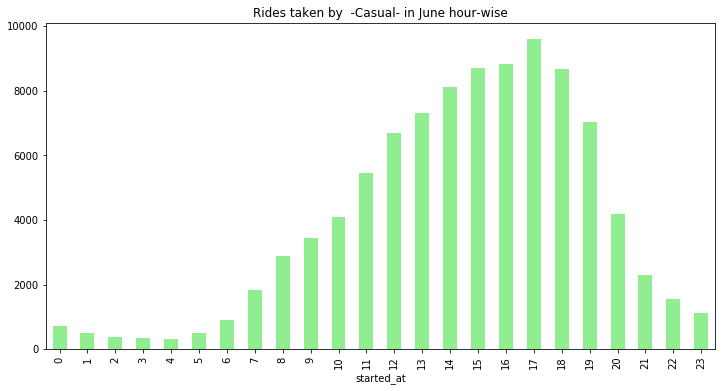

In [15]:
plt.figure(figsize=(12, 6))
df_clean[df_clean['member_casual'] == 'casual'].groupby(df_clean.started_at.dt.hour)['ride_id'].count().plot.bar(title='Rides taken by  -Casual- in June hour-wise', color = 'lightgreen');

Similar pattern followed by both causla and meber where 17 hrs is the peak time in a day and correlates with whole data

### Day wise

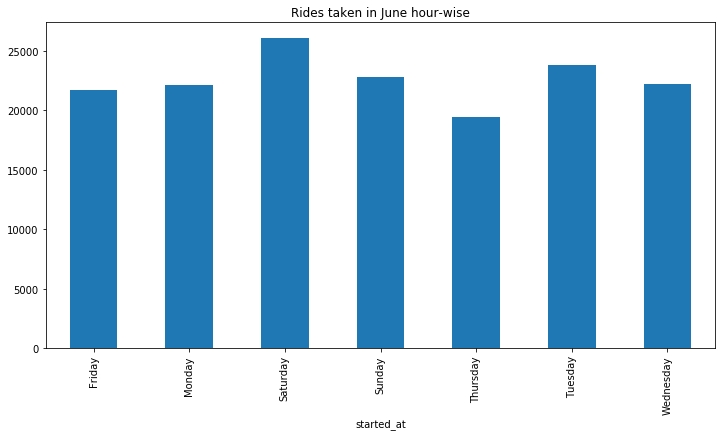

In [16]:
plt.figure(figsize=(12, 6))
df_clean.groupby(df_clean.started_at.dt.weekday_name)['ride_id'].count().plot.bar(title='Rides taken in June hour-wise');

Most of the rides are taken on Satuday, followed by Tuesday

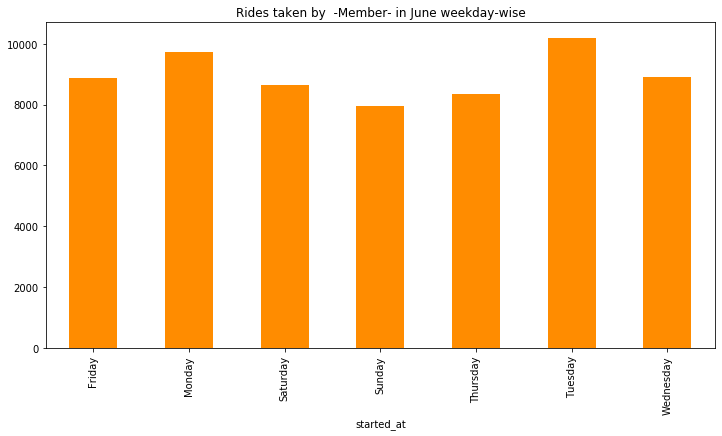

In [17]:
plt.figure(figsize=(12, 6))
df_clean[df_clean['member_casual'] == 'member'].groupby(df_clean.started_at.dt.weekday_name)['ride_id'].count().plot.bar(title='Rides taken by  -Member- in June weekday-wise', color= 'darkorange');

When looked into Member, Tuesday has most rides, followed by Monday

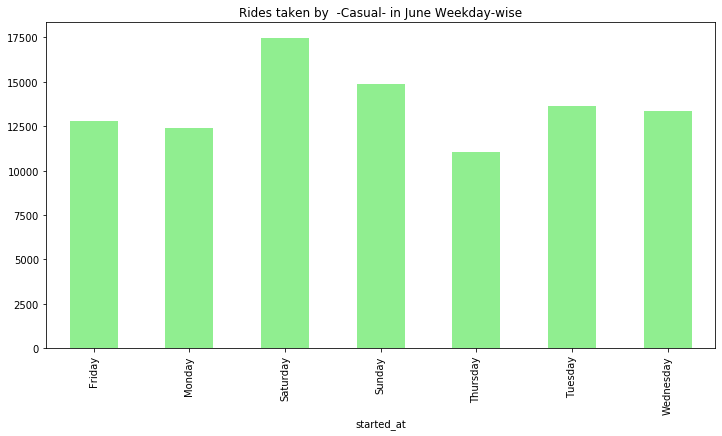

In [18]:
plt.figure(figsize=(12, 6))
df_clean[df_clean['member_casual'] == 'casual'].groupby(df_clean.started_at.dt.weekday_name)['ride_id'].count().plot.bar(title='Rides taken by  -Casual- in June Weekday-wise', color = 'lightgreen');

When looked into Casual, Saturday has most rides, followed by Sunday. Due to dominative rides from casual, the trend of whole data is mostly followe by casuals

### How long does the average trip take? (in mins)

In [19]:
# create a column for time duration in minutes
df_clean['duration_min']  =  ((df_clean.ended_at - df_clean.started_at).dt.seconds)/60

In [20]:
df_clean['duration_min'].describe()

count    158168.000000
mean         20.886424
std          43.783747
min           0.000000
25%           7.366667
50%          13.250000
75%          23.350000
max        1439.983333
Name: duration_min, dtype: float64

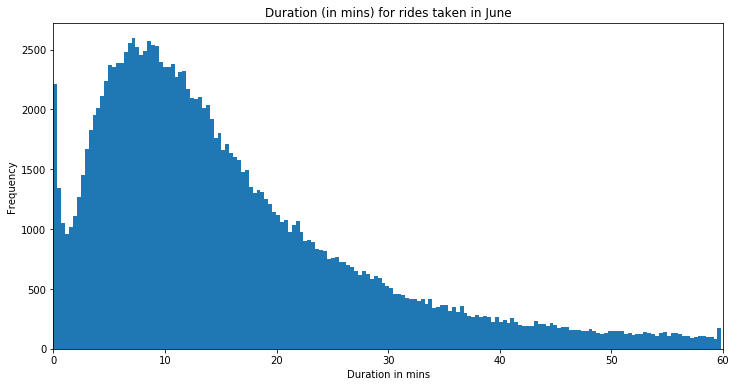

In [21]:
plt.figure(figsize=(12, 6))
bins = np.arange(0, 60, 0.35)
df_clean['duration_min'].plot.hist(bins = bins, title = 'Duration (in mins) for rides taken in June')
plt.xlim([0,60]);
plt.xlabel('Duration in mins');

The durations have a long tails since it is right skewed. The most avergae is around 8-10 min

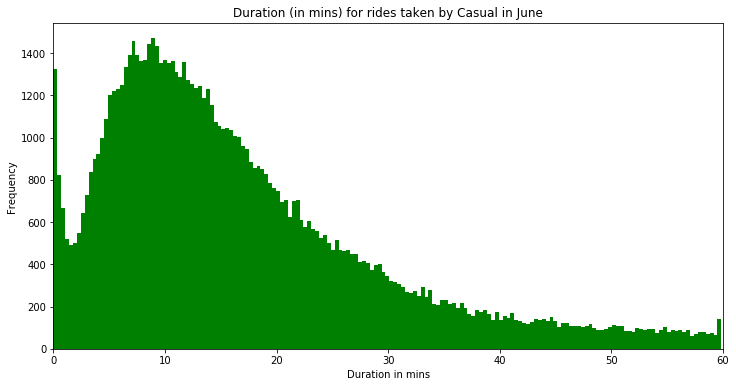

In [22]:
plt.figure(figsize=(12, 6))
bins = np.arange(0, 60, 0.35)
df_clean[df_clean['member_casual'] == 'casual']['duration_min'].plot.hist(bins = bins, color = 'green',  title = 'Duration (in mins) for rides taken by Casual in June')
plt.xlim([0,60]);
plt.xlabel('Duration in mins');

Even for casual durations have a long tails and right skewed. The most avergae is around 10 min. They have impact on whole data due to more bookings

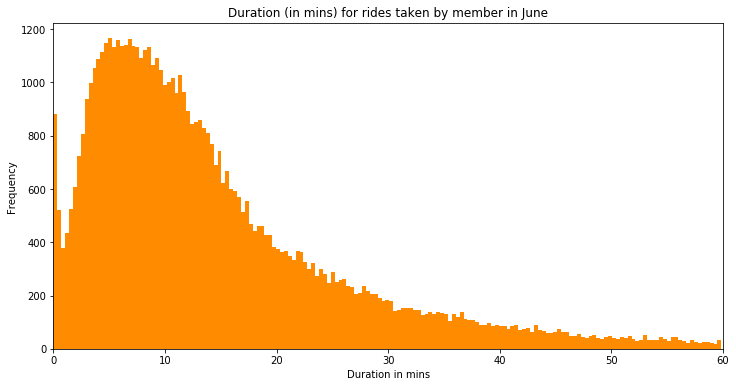

In [23]:
plt.figure(figsize=(12, 6))
bins = np.arange(0, 60, 0.35)
df_clean[df_clean['member_casual'] == 'member']['duration_min'].plot.hist(bins = bins,  title = 'Duration (in mins) for rides taken by member in June', color = 'darkorange')
plt.xlim([0,60]);
plt.xlabel('Duration in mins');

Even for members durations have a long tails and right skewed. The most avergae is around 5-8 min. They have impact on whole data due to more bookings

In [28]:
jupyter nbconvert ford_gobike.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-28-b42f69faea5a>, line 1)